Em aula de Analise Instrumental A, diciplina da UFMG, iniciamos analisando as buretas utilizadas nos experiemntos de forma que façamos as correções volumétricas, pois as buretas possuem erro entre o quanto foi observado e o quanto de fato foi utilizado. 

A próxima célula apresenta os volumes medidos em uma bureta de 10mL e a massa pesada de água, relacionamos a densidade, pressão atmosferica e temperatura para podermos fazer a equação de correção da bureta 14.

[[ 470.00987597  471.71109812  474.64098072]
 [ 938.03499275  932.83681395  929.24534496]
 [1874.36876335 1869.45412158 1861.04252315]
 [3745.99666879 3749.21008842 3752.99058209]
 [5640.96912267 5626.69775905 5628.96605526]
 [7518.17325628 7509.10007146 7522.520824  ]
 [9416.73717914 9398.02373546 9408.70363009]]
Média por linha: [ 472.1206516   933.37238389 1868.28846936 3749.3991131  5632.21097899
 7516.59805058 9407.8215149 ]
R² = 0.9999966


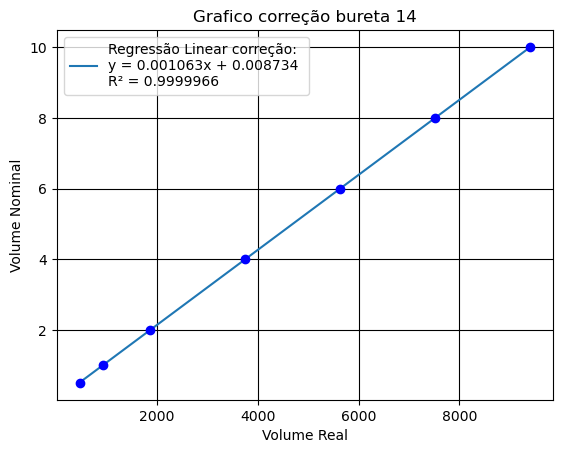

In [22]:
#Curva volumétrica bureta 14
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

dh= 0.996089
da=0.001061
ta=30
t=28.5
pa=923
g=10**(-5)

def v_m (m):
    v=m*(1/(dh*da))*(1-da)*(1-g*(t-20))
    return v

y=np.array([[0.4973,0.4991,0.5022],
            [0.9925,0.9870,0.9832],
            [1.9832,1.9780,1.9691],
            [3.9635,3.9669,3.9709],
            [5.9685,5.9534,5.9558],
            [7.9547,7.9451,7.9593],
            [9.9635,9.9437,9.9550]])
v=v_m(y)
print (v)

media_volume = np.mean(v, axis=1)
print("Média por linha:", media_volume)

vn=np.array([0.5,1,2,4,6,8,10])

# Regressão linear
coefficients = np.polyfit(media_volume,vn, 1)  # Coeficientes da regressão linear
poly = np.poly1d(coefficients)   # Objeto polinomial
vn_fit = poly(media_volume)  # Valores ajustados
plt.plot(media_volume, vn_fit, '-', label=f'Regressão Linear correção: \ny = {coefficients[0]:.6f}x + {coefficients[1]:.6f} \nR² = {r_squared:.7f}')

ss_res = np.sum((vn - vn_fit) ** 2)  # Soma dos quadrados dos resíduos
ss_tot = np.sum((vn - np.mean(vn)) ** 2)  # Soma dos quadrados totais
r_squared = 1 - (ss_res / ss_tot)
# Exibe o valor de R²
print(f"R² = {r_squared:.7f}")

plt.plot(media_volume,vn,'ob')
plt.xlabel('Volume Real')
plt.ylabel('Volume Nominal')
plt.title('Grafico correção bureta 14')


plt.legend()
plt.grid(True,color='k')
plt.show
plt.savefig('grafico_bureta14.png', format='png')


Titulação Potenciométrica

O próximo experimento realizado no laboratório foi titulação potenciometrica do " ", utilizamos indicadores indicados para faixa de pH de interesse e associamos a medido do pH-metro com o ponto de viragem pecebidos.

Para encontrar o ponto de viragem devemos fazer a devidada segunda do volume e o ph refente a derivada é a diferença entre n e n+1 não é necessário calcular a diferença dessa maneira diretamente. 
Você pode usar vNaOH[i] - vNaOH[i-1] para calcular a diferença entre o termo na posição i e o anterior.
De acordo com recomentdação do México temos:
Primeira derivada:
x=Vmed1 = (V1+V2)/2
y=\dpH/\dV

[-1.700000e-03  5.026500e-01  1.007000e+00  1.511350e+00  2.015700e+00
  2.267875e+00  2.520050e+00  2.772225e+00  3.024400e+00  3.276575e+00
  3.528750e+00  3.780925e+00  4.033100e+00  4.537450e+00  5.041800e+00
  5.293975e+00  5.546150e+00  5.798325e+00  6.050500e+00  6.302675e+00
  6.554850e+00  6.807025e+00  7.059200e+00  7.563550e+00  8.067900e+00
  8.572250e+00  9.076600e+00  9.580950e+00  1.008530e+01]
[0.250475  0.754825  1.259175  1.763525  2.1417875 2.3939625 2.6461375
 2.8983125 3.1504875 3.4026625 3.6548375 3.9070125 4.285275  4.789625
 5.1678875 5.4200625 5.6722375 5.9244125 6.1765875 6.4287625 6.6809375
 6.9331125 7.311375  7.815725  8.320075  8.824425  9.328775  9.833125 ] [ 0.0991375  -0.0198275   0.17844751  0.43620502  0.99137504  0.79310003
  1.30861505  4.44136017  5.71032021  1.74482007  0.79310003  0.71379003
  0.57499752  0.53534252  0.51551502  0.75344503  0.83275503  1.26896005
  3.68791514  5.63101021  1.70516506  0.87241003  0.51551502  0.31724001
  0.3370675

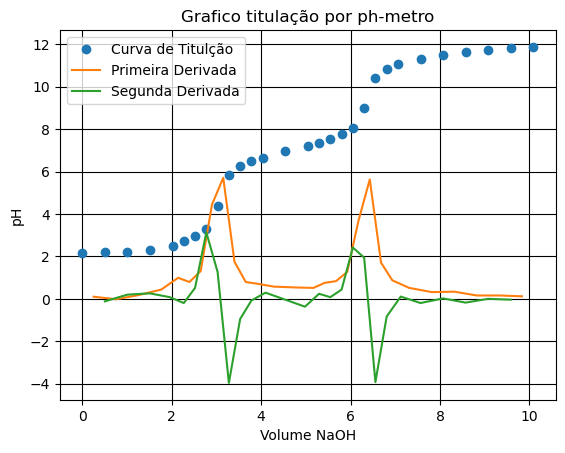

In [14]:
#Titulação pontenciometrica
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

vNaOH=np.array([0,0.5,1,1.5,2,2.25,2.5,2.75,3,3.25,3.5,3.75,4,4.5,5,5.25,5.5,5.75,6,6.25,6.5,6.75,7,7.5,8,8.5,9,9.5,10])
pH=np.array([2.15,2.2,2.19,2.28,2.5,2.75,2.95,3.28,4.4,5.84,6.28,6.48,6.66,6.95,7.22,7.35,7.54,7.75,8.07,9,10.42,10.85,11.07,11.33,11.49,11.66,11.74,11.82,11.88])

#Equacao Bureta 1
#y=ax+b
a=1.0087
b=-0.0017
r2=0.999998

v=a*vNaOH+b
print (v)
#---------------------------------------------
plt.plot(v, pH, 'o', label='Curva de Titulção')
plt.xlabel('Volume NaOH')
plt.ylabel('pH')
plt.title('Grafico titulação por ph-metro')
plt.legend()
plt.grid(True,color='k')
plt.savefig('grafico_titulacao_potenciomtrica.png', format='png')
#-------------------------------------------------------------------------------
#Primeira derivada:
def derivada(v):
    # Lista para armazenar as derivadas
    derivadas = []
    
    # Loop que começa no segundo elemento (índice 1)
    for i in range(1, len(v)):
        # Calcula a diferença entre o termo atual e o anterior
        dv = v[i] - v[i-1]
        derivadas.append(dv)
    
    return np.array(derivadas)  # Converte para array para melhor manipulação
def volume_medio(v):
    # Lista para armazenar os volumes médios
    volumes = []
    
    for i in range(1, len(v)):
        # Calcula o volume médio entre o termo atual e o anterior
        vm = (v[i] + v[i-1]) / 2
        volumes.append(vm)
    
    return np.array(volumes)  # Retorna como array


derivadas_vNaOH = derivada(v)
derivadas_pH=derivada(pH)
d1=derivadas_pH/derivadas_vNaOH
vmed_NaOH=volume_medio(v)
print (vmed_NaOH,d1)

#-------------------------------------------------------

plt.plot(vmed_NaOH,d1, '-', label='Primeira Derivada')
plt.legend()
plt.grid(True,color='k')
plt.savefig('grafico_titulacao_1devrivada.png', format='png')

#----------------------------------------------------------------
# Segunda derivada
derivadas2_vNaOH = derivada(vmed_NaOH)
derivadas2_pH=derivada(derivadas_pH)
vmed2_NaOH=volume_medio(vmed_NaOH)
d2=derivadas2_pH/derivadas2_vNaOH

plt.plot(vmed2_NaOH, d2, '-', label='Segunda Derivada')
plt.legend()
plt.grid(True,color='k')
plt.savefig('grafico_titulacao2derivada.png', format='png')

Sefunda derivada:
x=V'med1 = (Vmed1+Vmed2)/2
y=d2pH/\dV2

Com isso vamos ter um reta que intercepta o eixo x, iremos fazer uma reta e calcular qual o ponto de viragem

Valores de ph: [-0.118965    0.19827501  0.25775751  0.07931    -0.19827501  0.51551502
  3.13274512  1.26896005 -3.96550015 -0.95172004 -0.07931     0.29080334
 -0.039655   -0.37011335  0.23793001  0.07931     0.43620502  2.41895509
  1.94309507 -3.92584515 -0.83275503  0.10574667 -0.19827501  0.0198275
 -0.17844751  0.         -0.039655  ]


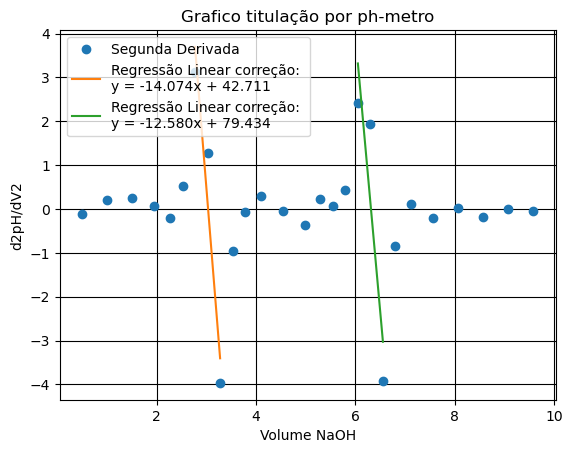

In [22]:
import pandas as pd
# Segunda derivada
derivadas2_vNaOH = derivada(vmed_NaOH)
derivadas2_pH=derivada(derivadas_pH)
vmed2_NaOH=volume_medio(vmed_NaOH)
d2=derivadas2_pH/derivadas2_vNaOH

plt.plot(vmed2_NaOH, d2, 'o', label='Segunda Derivada')
plt.xlabel('Volume NaOH')
plt.ylabel('d2pH/dV2')
plt.title('Grafico titulação por ph-metro')
plt.legend()
plt.grid(True,color='k')
plt.savefig('grafico_titulacao2derivada.png', format='png')

print ( "Valores de ph:",d2)

pv1=d2[6:9]
pv2=d2[17:20]
pvNaOH1=vmed2_NaOH[6:9]
pvNaOH2=vmed2_NaOH[17:20]

# Regressão linear
coefficients = np.polyfit(pvNaOH1,pv1, 1)  # Coeficientes da regressão linear
poly = np.poly1d(coefficients)   # Objeto polinomial
pv1_fit = poly(pvNaOH1)  # Valores ajustados
plt.plot(pvNaOH1, pv1_fit, '-', label=f'Regressão Linear correção: \ny = {coefficients[0]:.3f}x + {coefficients[1]:.3f}')

# Regressão linear
coefficients = np.polyfit(pvNaOH2,pv2, 1)  # Coeficientes da regressão linear
poly = np.poly1d(coefficients)   # Objeto polinomial
pv2_fit = poly(pvNaOH2)  # Valores ajustados
plt.plot(pvNaOH2, pv2_fit, '-', label=f'Regressão Linear correção: \ny = {coefficients[0]:.3f}x + {coefficients[1]:.3f}')
plt.legend()

In [50]:
#Equacao ponto de viragem 1
a1=-14.074046
b1=42.710947

#equacao ponto de viragem 2
a2=-12.580153
b2=79.434018

def calcular_x (a,b,y):
    x=(y-b)/a
    return x
y=0
x1=calcular_x(a1,b1,y)
x2=calcular_x(a2,b2,y)

print (x1,x2)

3.034731235069148 6.314233062189307


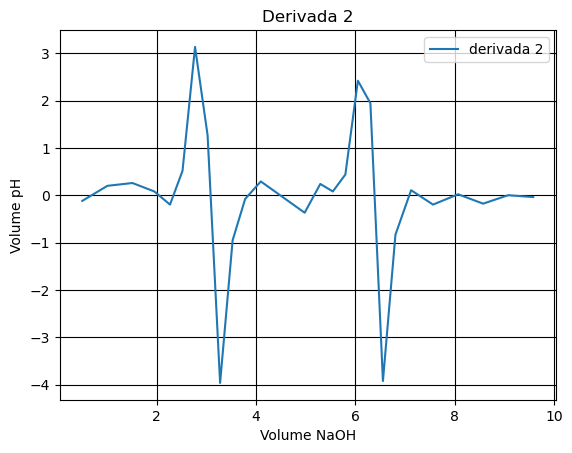

In [58]:
# agora fazendo a devida 2
derivadas2_vNaOH = derivada(vmed_NaOH)
derivadas2_pH=derivada(derivadas_pH)
vmed2_NaOH=volume_medio(vmed_NaOH)
d2=derivadas2_pH/derivadas2_vNaOH

plt.plot(vmed2_NaOH, d2, '-', label='derivada 2')
plt.xlabel('Volume NaOH')
plt.ylabel('Volume pH')
plt.title('Derivada 2')
plt.legend()
plt.grid(True,color='k')
plt.savefig('grafico_titulacao2derivada.png', format='png')

[-1.700000e-03  5.026500e-01  1.007000e+00  1.511350e+00  2.015700e+00
  2.520050e+00  3.024400e+00  3.276575e+00  3.528750e+00  3.780925e+00
  4.033100e+00  4.285275e+00  4.537450e+00  4.789625e+00  5.041800e+00
  5.293975e+00  5.546150e+00  5.798325e+00  6.050500e+00  6.554850e+00
  7.059200e+00  7.563550e+00  8.067900e+00  8.572250e+00  9.076600e+00
  9.580950e+00  1.008530e+01]


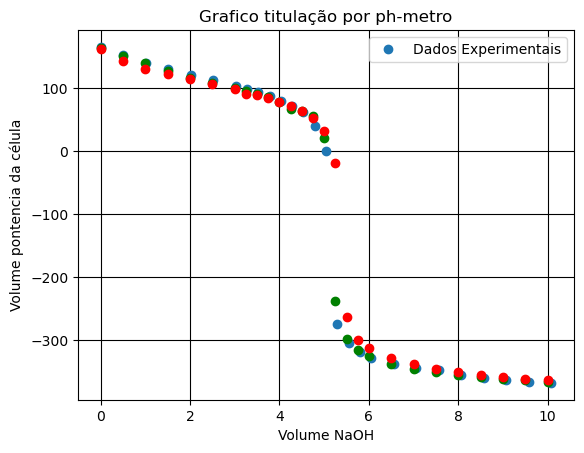

In [60]:
#Titulação pontenciome de ASS
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

vNaOHe=np.array([0,0.5,1,1.5,2,2.5,3,3.25,3.5,3.75,4,4.25,4.5,4.75,5,5.25,5.5,5.75,6,6.5,7,7.5,8,8.5,9,9.5,10])
E1=np.array([165,152,139,130,120,112,103,98,93,87,80,72,61,40,0,-274,-305,-319,-328,-338,-345,-348,-356,-360,-363,-366,-368])
E2=np.array([163,150,139,127,116,107,100,95,91,85,77,66,64,56,21,-238,-298,-315,-326,-338,-346,-351,-355,-359,-361,-363,-367])
E3=np.array([162,143,130,122,114,106,98,91,89,84,78,72,63,52,31,-19,-264,-300,-312,-329,-338,-346,-350,-355,-358,-361,-364])
#Equacao Bureta 1
#y=ax+b
ve=a*vNaOHe+b
print (ve)
#---------------------------------------------
plt.plot(ve, E1, 'o', label='Dados Experimentais')
plt.plot(vNaOHe,E2,'go')
plt.plot(vNaOHe,E3,'ro')
plt.xlabel('Volume NaOH')
plt.ylabel('Volume pontencia da célula')
plt.title('Grafico titulação potenciometria')
plt.legend()
plt.grid(True,color='k')
plt.savefig('grafico_titulacao_ass.png', format='png')

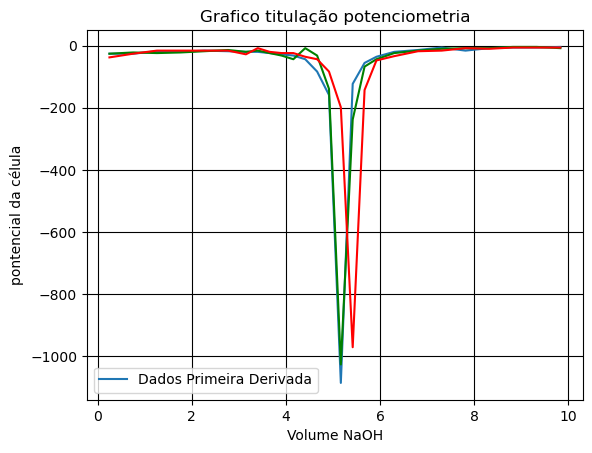

In [78]:
derivadas_vNaOHe = derivada(ve)
derivadas_E1=derivada(E1)
derivadas_E2=derivada(E2)
derivadas_E3=derivada(E3)
dE1=derivadas_E1/derivadas_vNaOHe
dE2=derivadas_E2/derivadas_vNaOHe
dE3=derivadas_E3/derivadas_vNaOHe
vmed_NaOHe=volume_medio(ve)

#-------------------------------------------------------

plt.plot(vmed_NaOHe,dE1, '-', label='Dados Primeira Derivada')
plt.plot(vmed_NaOHe,dE2,'g-')
plt.plot(vmed_NaOHe,dE3,'r-')
plt.xlabel('Volume NaOH')
plt.ylabel('pontencial da célula')
plt.title('Grafico titulação potenciometria')
plt.legend()
plt.grid(True,color='k')
plt.savefig('grafico_ass_1deriv.png', format='png')

Volume medio [0.50265    1.007      1.51135    2.0157     2.52005    2.96135625
 3.276575   3.52875    3.780925   4.0331     4.285275   4.53745
 4.789625   5.0418     5.293975   5.54615    5.798325   6.11354375
 6.55485    7.0592     7.56355    8.0679     8.57225    9.0766
 9.58095   ], derivada 2 do E1 [   0.            7.9310003    -1.98275007    3.96550015   -1.98275007
   10.57466706    0.           -3.96550015   -3.96550015   -3.96550015
  -11.89650045  -39.65500149  -75.34450283 -927.9270348   963.61653614
   67.41350253   19.82750074   -2.64366677    5.94825022    7.9310003
   -9.91375037    7.9310003     1.98275007    0.            1.98275007], derivada 2 de E2[   3.96550015   -1.98275007    1.98275007    3.96550015    3.96550015
    5.28733353    3.96550015   -7.9310003    -7.9310003   -11.89650045
   35.68950134  -23.79300089 -107.06850402 -888.27203331  789.13452959
  170.51650639   23.79300089   -2.64366677    7.9310003     5.94825022
    1.98275007    0.            3.96550

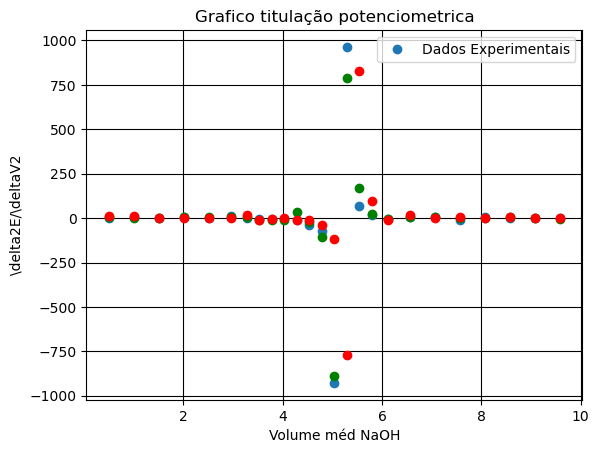

In [87]:
# agora fazendo a devida 2
derivadas2_vNaOHe = derivada(vmed_NaOHe)
vmed2_NaOHe=volume_medio(vmed_NaOHe)

derivadas2_E1=derivada(derivadas_E1)
derivadas2_E2=derivada(derivadas_E2)
derivadas2_E3=derivada(derivadas_E3)
d2E1=derivadas2_E1/derivadas2_vNaOHe
d2E2=derivadas2_E2/derivadas2_vNaOHe
d2E3=derivadas2_E3/derivadas2_vNaOHe

print ('Volume medio {}, derivada 2 do E1 {}, derivada 2 de E2{}, derivada segunda de E3 {}'.format(vmed2_NaOHe,d2E1,d2E2,d2E3))
#-------------------------------------------------------

plt.plot(vmed2_NaOHe,d2E1, 'o', label='Dados Experimentais')
plt.plot(vmed2_NaOHe,d2E2,'go')
plt.plot(vmed2_NaOHe,d2E3,'ro')
plt.xlabel('Volume méd NaOH')
plt.ylabel('\delta2E/\deltaV2')
plt.title('Grafico titulação potenciometrica')
plt.legend()
plt.grid(True,color='k')
plt.savefig('grafico_ass_2deriv.png', format='png')

In [97]:
p1= (5.0418+5.293975)/2
print (p1)

5.1678875
